# Import Libraries

In [12]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from graphviz import Digraph
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Prepare Dataset

## Download and Extract the Dataset

In [2]:
# dataset link: https://data.mendeley.com/datasets/hxsnvwty3r/1

# download the dataset and save it as `mango_leaf_bd_dataset.zip`
!curl -o mango_leaf_bd_dataset.zip https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/hxsnvwty3r-1.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  103M  100  103M    0     0  16.4M      0  0:00:06  0:00:06 --:--:-- 21.7M


In [ ]:
!unzip /content/mango_leaf_bd_dataset.zip
# rename the extracted directory
!mv MangoLeafBD\ Dataset mango_leaf_bd_dataset

## Flatten the Images and Create a DataFrame

In [4]:
def prepare_dataset(dataset_path: str, target_size: tuple):
    # for image pixel values
    data = []
    # for disease names (labels)
    labels = []

    # loop through each disease folder and process images
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        # check if it's a directory
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, filename)

                # load the image
                #img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # load as grayscale to reduce dimensions
                img = cv2.imread(image_path)

                # resize all images to `target_size`
                img = cv2.resize(img, target_size)

                # flatten the image and add to the data list
                img_flat = img.flatten()
                data.append(img_flat)

                # add the directory name as the label
                labels.append(folder_name)

    return data, labels

In [5]:
# define path to the dataset
dataset_path = '/content/mango_leaf_bd_dataset'

# resize all images to 120x160
# or else colab runtime's ram limit will exceed
data, labels = prepare_dataset(dataset_path, (120, 160))

In [6]:
# convert to a dataframe
df = pd.DataFrame(data)
# add labels as a column
df['label'] = labels

## Display the DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 57601 entries, 0 to label
dtypes: object(1), uint8(57600)
memory usage: 219.8+ MB


In [8]:
print(f"DataFrame Shape:\n{df.shape}")

DataFrame Shape:
(4000, 57601)


In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,57591,57592,57593,57594,57595,57596,57597,57598,57599,label
0,175,180,179,175,180,179,175,180,179,175,...,146,152,151,148,154,153,144,150,149,Die Back
1,233,218,215,233,218,215,233,218,215,233,...,205,187,186,205,187,186,205,187,186,Die Back
2,232,213,198,233,214,199,233,214,199,234,...,199,165,142,199,165,142,198,164,141,Die Back
3,81,95,93,82,96,94,81,95,93,80,...,74,95,93,73,94,92,72,93,91,Die Back
4,223,192,159,223,192,159,223,192,159,223,...,209,183,159,208,182,158,208,182,158,Die Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,231,228,224,232,229,225,232,229,225,231,...,194,203,212,196,205,214,197,206,215,Healthy
3996,244,239,236,245,240,237,246,241,238,246,...,202,204,205,201,203,204,201,203,204,Healthy
3997,203,200,202,203,200,202,204,201,203,205,...,231,226,225,231,226,225,231,226,225,Healthy
3998,254,255,251,254,255,251,254,255,251,255,...,202,205,209,201,204,208,201,204,208,Healthy


## Split the Dataset

In [10]:
# define the features and the label
y = df['label']
X = df.drop('label', axis=1)

# do a strified split on the data with 80% train and 20% test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Decision Tree

In [13]:
# create a decision tree classifier with "entropy" criterion
#dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

# fit the model on the train data
dt.fit(X_train, y_train)

# make predictions on the test data
y_pred_dt = dt.predict(X_test)

Accuracy: 0.70
Precision: 0.70
Recall: 0.70
F1-score: 0.70
Classification Report:
                   precision    recall  f1-score   support

     Anthracnose       0.70      0.55      0.61       100
Bacterial Canker       0.73      0.78      0.75       100
  Cutting Weevil       0.94      0.98      0.96       100
        Die Back       0.79      0.89      0.84       100
      Gall Midge       0.55      0.58      0.57       100
         Healthy       0.78      0.62      0.69       100
  Powdery Mildew       0.60      0.64      0.62       100
     Sooty Mould       0.52      0.56      0.54       100

        accuracy                           0.70       800
       macro avg       0.70      0.70      0.70       800
    weighted avg       0.70      0.70      0.70       800



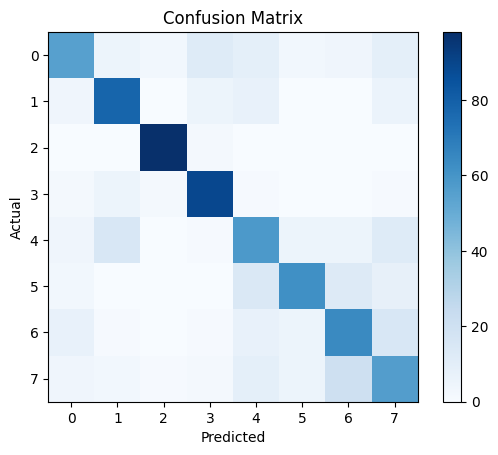

In [14]:
# calculate the accuracy, precision, recall, and f1-score
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt, average='macro')
dt_rec = recall_score(y_test, y_pred_dt, average='macro')
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
dt_report = classification_report(y_test, y_pred_dt)

# print the results
print(f"Accuracy: {dt_acc:.2f}")
print(f"Precision: {dt_prec:.2f}")
print(f"Recall: {dt_rec:.2f}")
print(f"F1-score: {dt_f1:.2f}")
# print the classification report
print("Classification Report:\n", dt_report)

# plot the confusion matrix
dt_cm = confusion_matrix(y_test, y_pred_dt)

plt.imshow(dt_cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

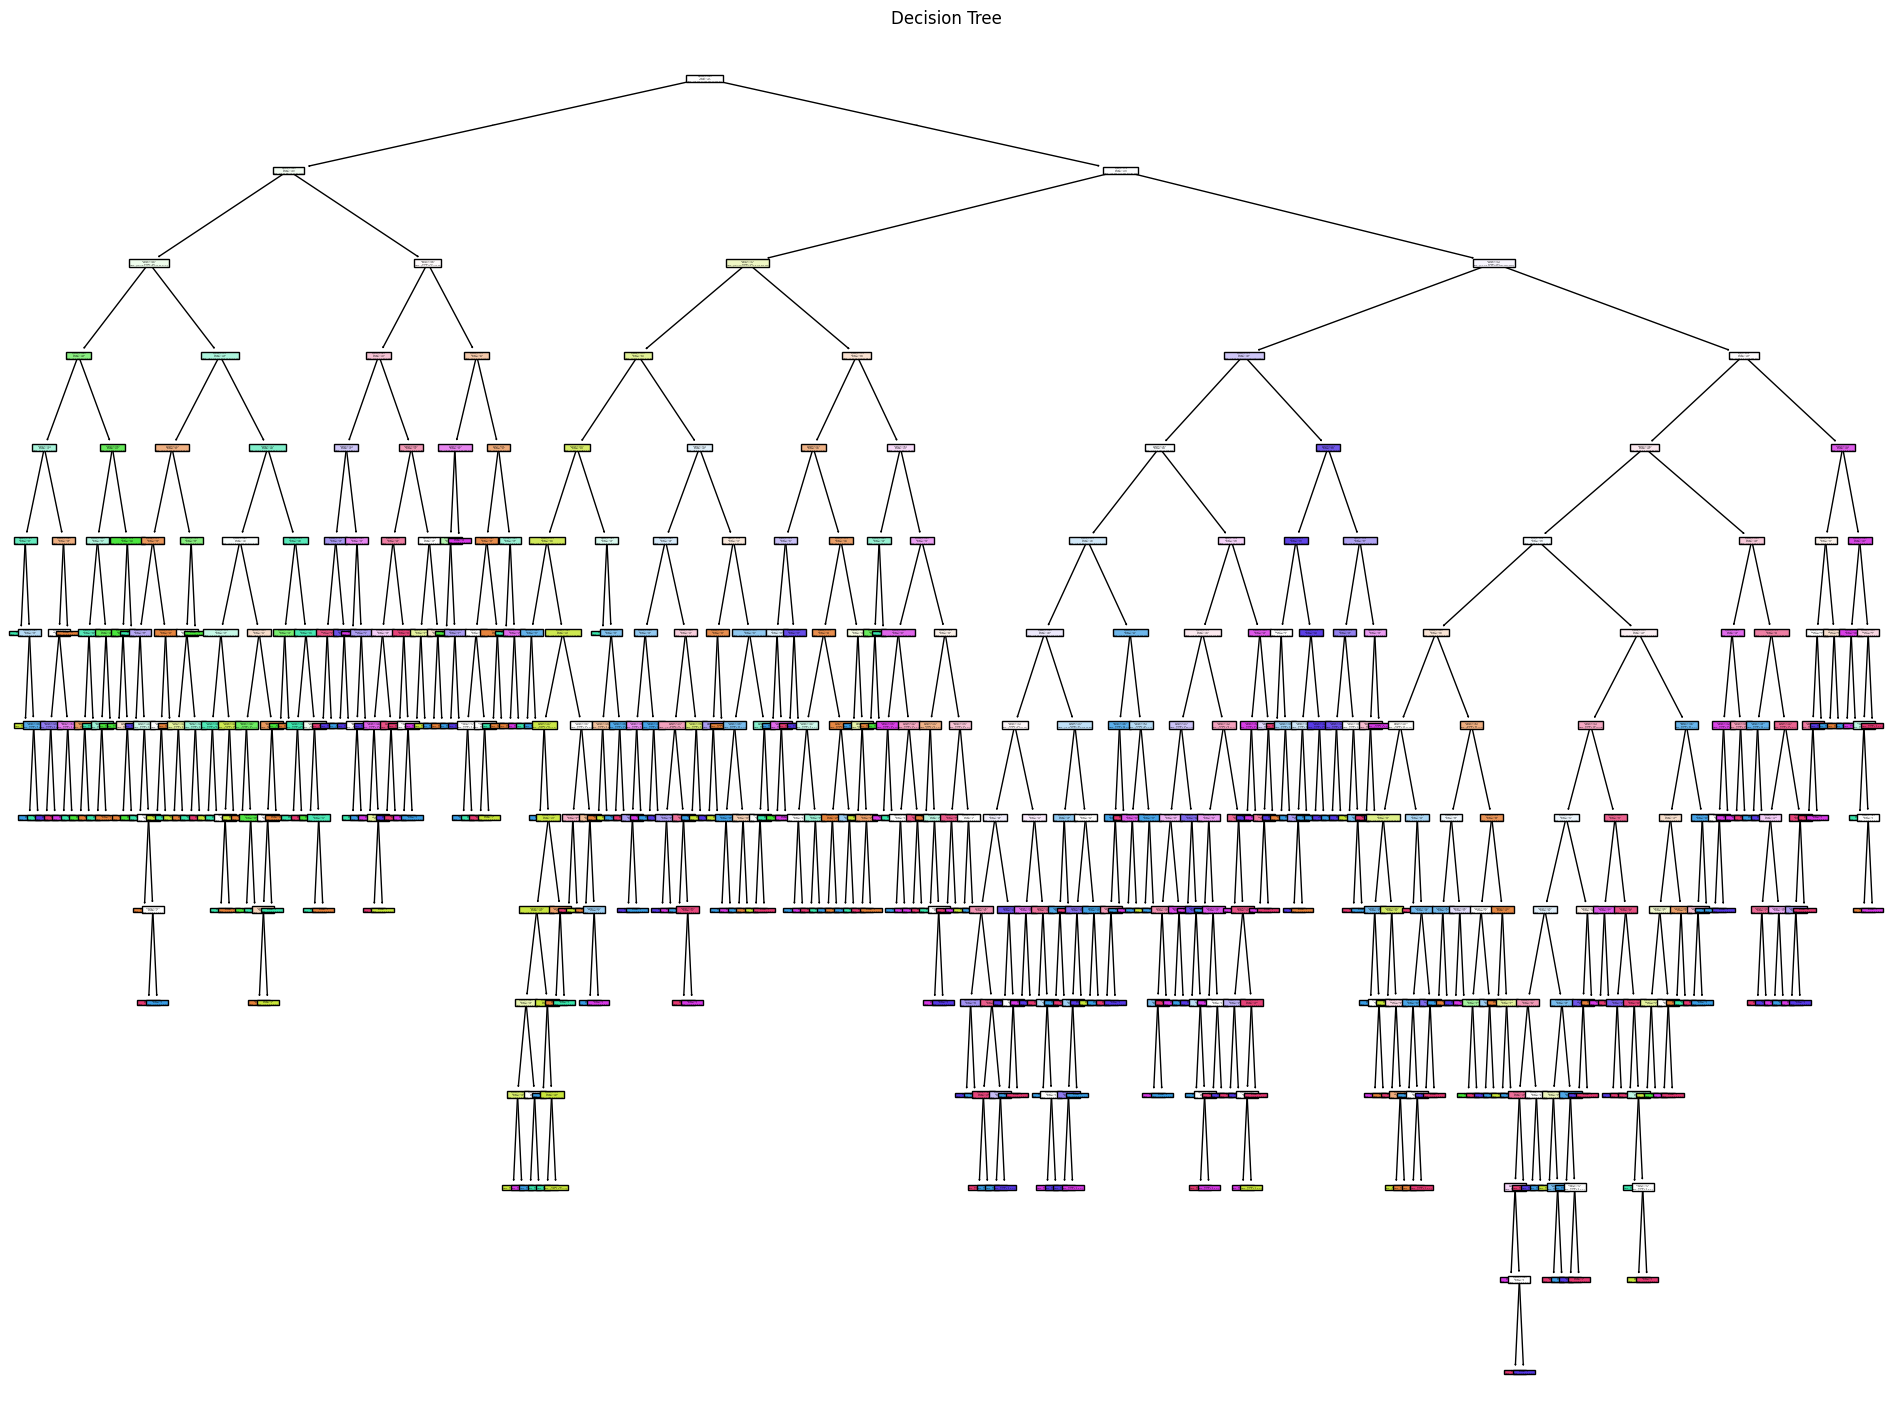

In [19]:
# plot the decision tree
plt.figure(figsize=(24, 18))

tree.plot_tree(dt, filled=True)

plt.title('Decision Tree')
plt.show()

# Random Forest

In [16]:
# create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
rf_classifier.fit(X_train, y_train)

# make predictions
y_pred_rf = rf_classifier.predict(X_test)

Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1-score: 0.88
Classification Report:
                   precision    recall  f1-score   support

     Anthracnose       0.92      0.85      0.89       100
Bacterial Canker       0.84      0.92      0.88       100
  Cutting Weevil       0.99      1.00      1.00       100
        Die Back       0.96      0.97      0.97       100
      Gall Midge       0.76      0.80      0.78       100
         Healthy       0.88      0.87      0.87       100
  Powdery Mildew       0.95      0.80      0.87       100
     Sooty Mould       0.77      0.84      0.80       100

        accuracy                           0.88       800
       macro avg       0.89      0.88      0.88       800
    weighted avg       0.89      0.88      0.88       800



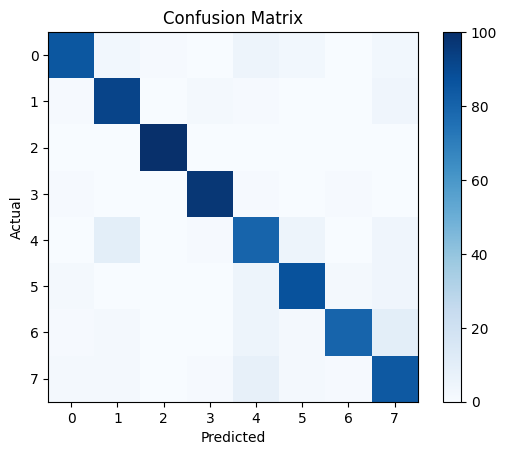

In [17]:
# evaluate performance
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf, average='macro')
rf_rec = recall_score(y_test, y_pred_rf, average='macro')
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_report = classification_report(y_test, y_pred_rf)

# print the results
print(f"Accuracy: {rf_acc:.2f}")
print(f"Precision: {rf_prec:.2f}")
print(f"Recall: {rf_rec:.2f}")
print(f"F1-score: {rf_f1:.2f}")
# print the classification report
print("Classification Report:\n", rf_report)

# plot the confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)

plt.imshow(rf_cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

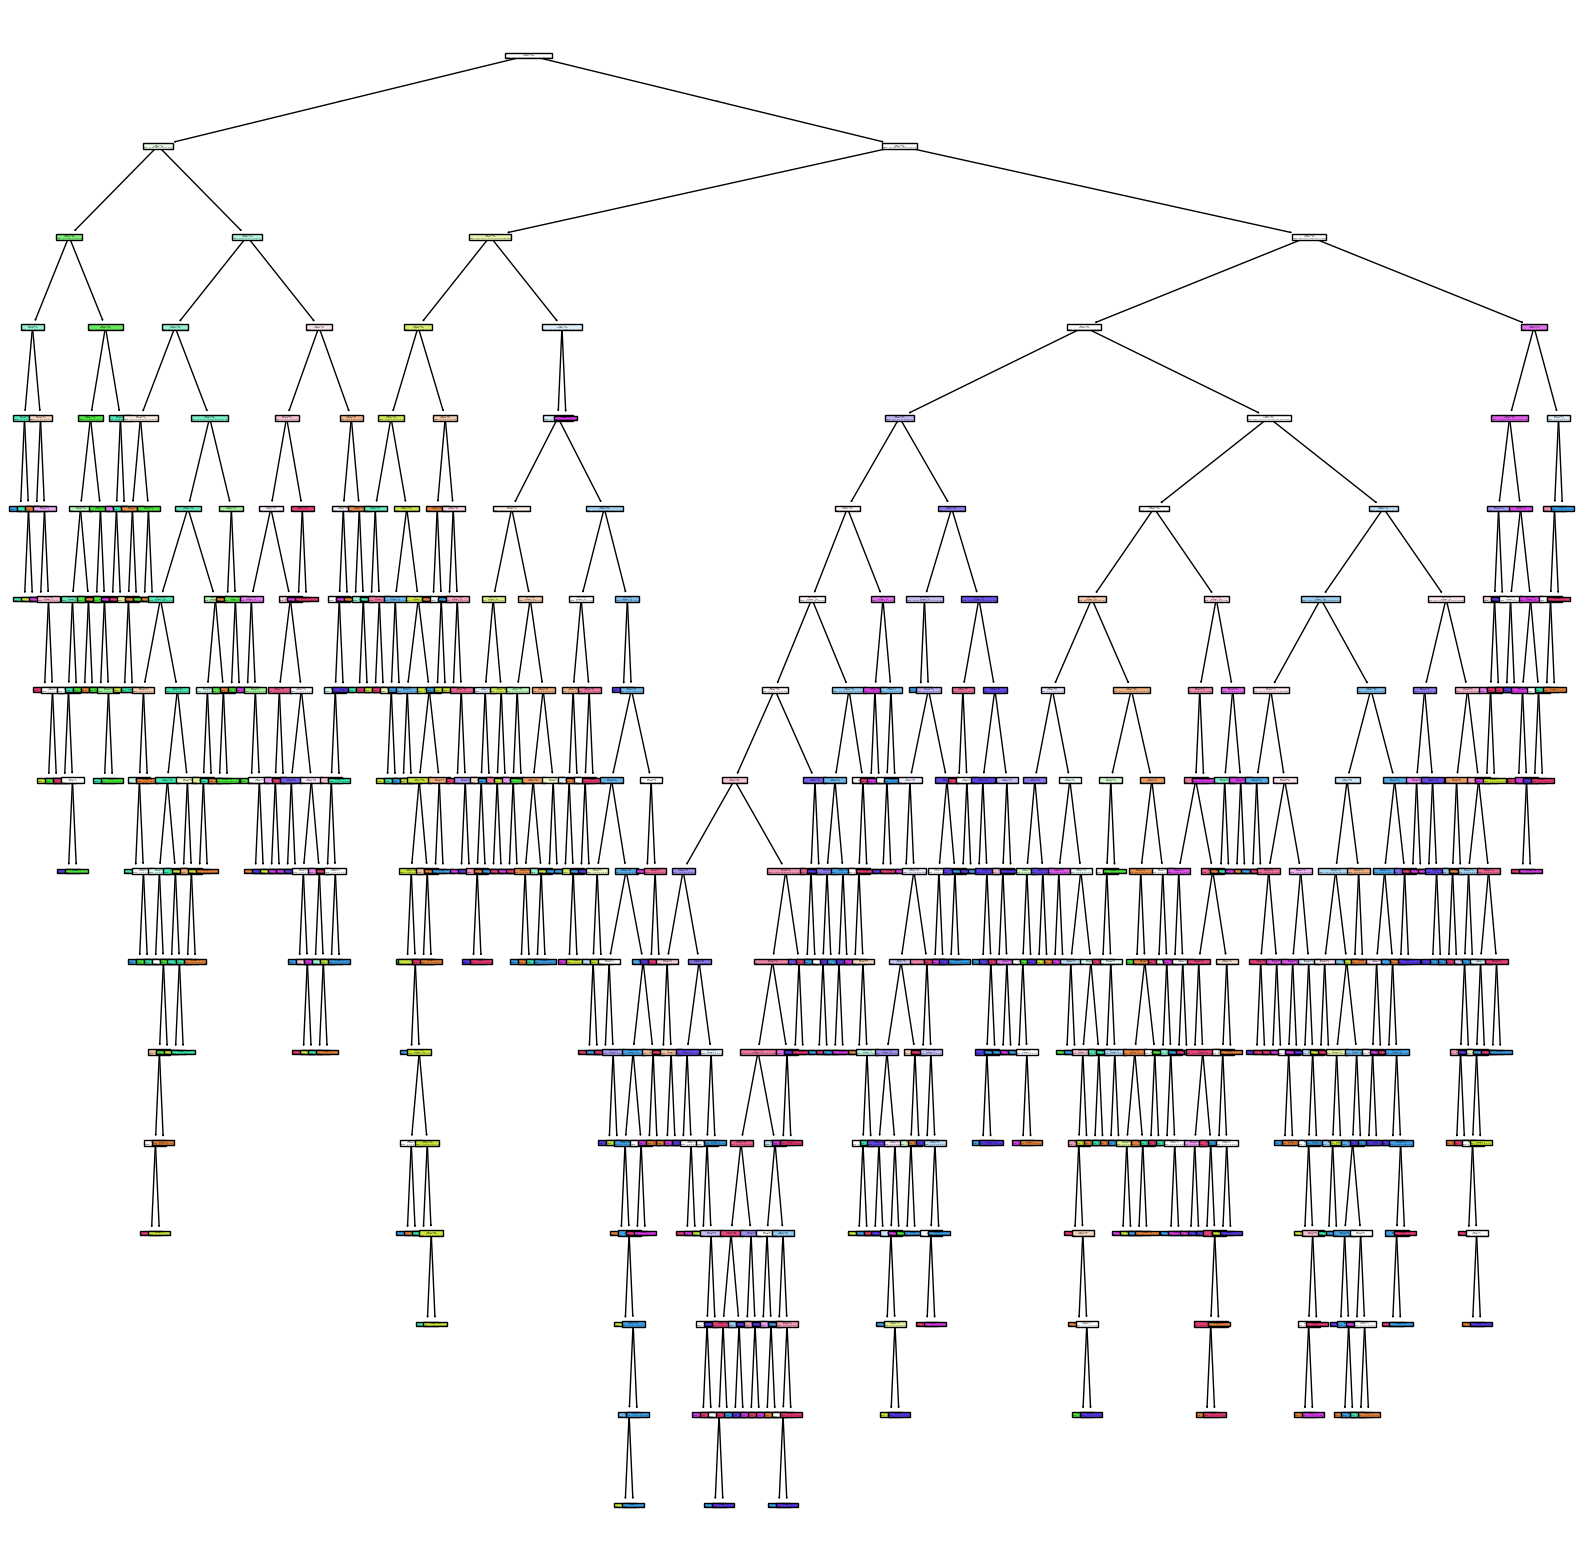

In [18]:
plt.figure(figsize=(20, 20))
tree.plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, filled=True)
plt.show()